# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na √°rea de Marketing em entender as necessidades e demandas dos clientes de maneira f√°cil e r√°pida nas redes sociais. A solu√ß√£o proposta para esse problema foi o desenvolvimento de uma Intelig√™ncia Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solu√ß√£o √© rastrear os dados em tempo real, analisar e interpretar as mensagens e coment√°rios enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto est√° utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informa√ß√µes dispostas nesse dataset, realizaremos insights a cerca dos coment√°rios feitos nos posts do Instagram do pr√≥prio banco. Vale lembrar que os dados est√£o anonimizados e resguardados para manter a privacidade e √©tica com os usu√°rios e com o banco.

# 1. Instala√ß√£o / Setup

Para o in√≠cio do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma c√©lula de conex√£o com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisar√° do dataset baixado.

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Aqui n√≥s fazemos as importa√ß√µes para tratamento dos dados e modelagem do Bag of Words, para logo depois aplicar o algoritmo de Naive Bayes.

In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

from sklearn.feature_extraction.text import CountVectorizer
import ast
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict

import seaborn as sns


import nltk
import spacy
import gensim
import pickle
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *


# 2. Entendimento e Tratamento dos Dados

Rodando o dataset, para analisar seu conte√∫do:

In [11]:
df = pd.read_csv('/content/drive/MyDrive/MoÃÅdulo 6/Sprint 3 - Projeto/nova_base_tratada (1)')
df

Unnamed: 0                     autor  sentimento  \
0              0             winthegame_of           1   
1              1                marta_bego           1   
2              2                lmviapiana           2   
3              3              vanilson_dos           1   
4              4               ricktolledo           2   
...          ...                       ...         ...   
9202        9472  perspectiveinvestimentos           2   
9203        9473            eduardocolares           2   
9204        9474                 danielucm           2   
9205        9475          amgcapitalinvest           1   
9206        9476                 bfmarilia           0   

                                          texto_tratado  
0     ['alvarez', 'marsal', 'estar', 'conosco', 'spo...  
1     ['btgpactual', 'with', 'makerepost', 'entender...  
2                           ['minuto', 'touro', 'ouro']  
3                                               ['sim']  
4     ['querer', 'saber', 'banking', 'pr√≥prio', 'adm...  
...                                                 ...  
9202                        ['excelente', 'explica√ß√£o']  
9203            ['atendar', 'telefone', 'amor', 'deus']  
9204  ['saber', 'qual', 'grande', 'fiis', 'mercado',...  
9205  ['erro', 'financeiro', 'eliminar', 'antes', 'a...  
9206  ['porque', 'morning', 'call', 'aparecer', 'spo...  

[9207 rows x 4 columns]

In [12]:
df.columns

Index(['Unnamed: 0', 'autor', 'sentimento', 'texto_tratado'], dtype='object')

In [13]:
df['texto_tratado'] = df['texto_tratado'].str.replace("'", "")
df['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, makerepost, entender, impac...
2                                   [minuto, touro, ouro]
3                                                   [sim]
4           [querer, saber, banking, pr√≥prio, administro]
                              ...                        
9202                              [excelente, explica√ß√£o]
9203                      [atendar, telefone, amor, deus]
9204    [saber, qual, grande, fiis, mercado, selecione...
9205    [erro, financeiro, eliminar, antes, ano, _, pa...
9206    [porque, morning, call, aparecer, spotify, atu...
Name: texto_tratado, Length: 9207, dtype: object

In [14]:
df

Unnamed: 0                     autor  sentimento  \
0              0             winthegame_of           1   
1              1                marta_bego           1   
2              2                lmviapiana           2   
3              3              vanilson_dos           1   
4              4               ricktolledo           2   
...          ...                       ...         ...   
9202        9472  perspectiveinvestimentos           2   
9203        9473            eduardocolares           2   
9204        9474                 danielucm           2   
9205        9475          amgcapitalinvest           1   
9206        9476                 bfmarilia           0   

                                          texto_tratado  
0     [alvarez, marsal, estar, conosco, sportainmet,...  
1     [btgpactual, with, makerepost, entender, impac...  
2                                 [minuto, touro, ouro]  
3                                                 [sim]  
4         [querer, saber, banking, pr√≥prio, administro]  
...                                                 ...  
9202                            [excelente, explica√ß√£o]  
9203                    [atendar, telefone, amor, deus]  
9204  [saber, qual, grande, fiis, mercado, selecione...  
9205  [erro, financeiro, eliminar, antes, ano, _, pa...  
9206  [porque, morning, call, aparecer, spotify, atu...  

[9207 rows x 4 columns]

## 2.1 Visualiza√ß√£o dos dados

### Autores que mais comentam

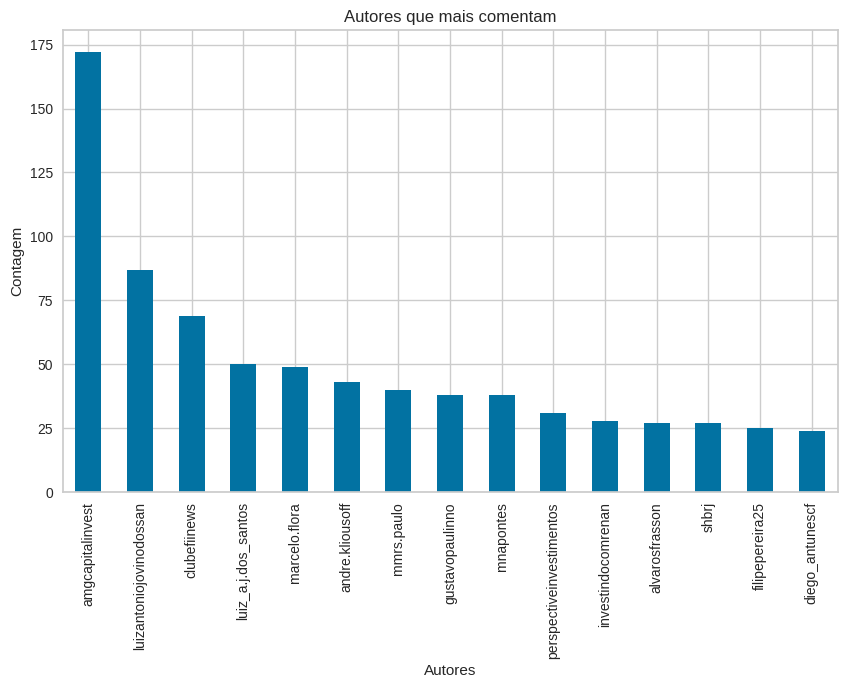

In [15]:
# Contagem de palavras
autor_counts = df['autor'].explode().value_counts()

# Plotagem do gr√°fico de barras
plt.figure(figsize=(10, 6))
autor_counts.head(15).plot(kind='bar')
plt.xlabel('Autores')
plt.ylabel('Contagem')
plt.title('Autores que mais comentam')
plt.show()

# 3. Bag of Words (BoW)

O modelo Bag of Words (BoW) √© uma t√©cnica utilizada em processamento de linguagem natural para representar um texto como um conjunto de palavras desordenadas, ignorando a ordem e a estrutura gramatical das frases. 

Nesse modelo, cada palavra √∫nica do texto √© transformada em uma "feature" (caracter√≠stica), e a frequ√™ncia de cada palavra no texto √© usada como um valor num√©rico para a feature correspondente.

Por exemplo, a frase "O gato preto pulou o muro" seria representada como um conjunto de palavras desordenadas: `'o', 'gato', 'preto', 'pulou', 'o', 'muro'`. A frequ√™ncia de cada palavra seria contada, e o resultado seria um vetor num√©rico que representa a frequ√™ncia de cada palavra na frase.


## 3.1 Teste isolado

In [16]:
# Multiple documents
text = ["Estamos fazendo um projeto pro BTG!", "Somos alunos de Sistemas de Informa√ß√£o do Inteli", "O Renato √© o nosso orientador", "O Hayashi √© o nosso professor de programa√ß√£o"] 

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(sorted(vectorizer.vocabulary_))

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

['alunos', 'btg', 'de', 'do', 'estamos', 'fazendo', 'hayashi', 'informa√ß√£o', 'inteli', 'nosso', 'orientador', 'pro', 'professor', 'programa√ß√£o', 'projeto', 'renato', 'sistemas', 'somos', 'um']
(4, 19)
[[0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1]
 [1 0 2 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0]]


**AVISO**:
O modelo Bag of Words √© uma t√©cnica simples e eficiente para representar textos em formato vetorial, o que permite utiliz√°-los em algoritmos de aprendizado de m√°quina. 

No entanto, essa abordagem ignora informa√ß√µes importantes sobre a estrutura e o significado das frases, como a ordem das palavras e as rela√ß√µes sint√°ticas entre elas. Por isso, √© comum utilizar t√©cnicas mais avan√ßadas, como a modelagem de t√≥picos (topic modeling) e as redes neurais, para lidar com textos mais complexos.

Por√©m, para vieses acad√™micos, estamos implementando e aprendendo como √© o funcionamento desse processo.

## 3.2 Defini√ß√£o da Fun√ß√£o


In [17]:
df

Unnamed: 0                     autor  sentimento  \
0              0             winthegame_of           1   
1              1                marta_bego           1   
2              2                lmviapiana           2   
3              3              vanilson_dos           1   
4              4               ricktolledo           2   
...          ...                       ...         ...   
9202        9472  perspectiveinvestimentos           2   
9203        9473            eduardocolares           2   
9204        9474                 danielucm           2   
9205        9475          amgcapitalinvest           1   
9206        9476                 bfmarilia           0   

                                          texto_tratado  
0     [alvarez, marsal, estar, conosco, sportainmet,...  
1     [btgpactual, with, makerepost, entender, impac...  
2                                 [minuto, touro, ouro]  
3                                                 [sim]  
4         [querer, saber, banking, pr√≥prio, administro]  
...                                                 ...  
9202                            [excelente, explica√ß√£o]  
9203                    [atendar, telefone, amor, deus]  
9204  [saber, qual, grande, fiis, mercado, selecione...  
9205  [erro, financeiro, eliminar, antes, ano, _, pa...  
9206  [porque, morning, call, aparecer, spotify, atu...  

[9207 rows x 4 columns]

In [18]:
def bow(frases):
    # Inicializa o CountVectorizer
    vectorizer = CountVectorizer()

    # Concatena os tokens de cada frase em uma √∫nica string
    frases_concatenadas = [''.join(tokens) for tokens in frases]

    # Cria o modelo Bag of Words
    bow_model = vectorizer.fit_transform(frases_concatenadas)

    # Dicion√°rio de palavras
    dicionario = vectorizer.vocabulary_

    return bow_model, dicionario

# Aplicar a fun√ß√£o de Bag of Words
bow_model, dicionario = bow(df['texto_tratado'].tolist())

## 3.3 Testes das fun√ß√µes


In [19]:
bow_model, dicionario

(<9207x19392 sparse matrix of type '<class 'numpy.int64'>'
 	with 176805 stored elements in Compressed Sparse Row format>,
 {'alvarez': 766,
  'marsal': 11388,
  'estar': 6683,
  'conosco': 4114,
  'sportainmet': 16955,
  'registered': 15328,
  'labsr': 10376,
  'primeiro': 14331,
  'evento': 6853,
  'sportainment': 16954,
  'am√©ricar': 895,
  'latino': 10462,
  'parceria': 13273,
  'hubstage': 8944,
  'bichar': 2182,
  'motta': 12088,
  'advogado': 381,
  'win': 18965,
  'the': 17577,
  'game': 8052,
  'participe': 13312,
  'online': 12915,
  'gratuito': 8453,
  'mar√ßo': 11408,
  'inscreva_se': 9506,
  'linkr': 10733,
  'bio': 2206,
  'blueheart': 2297,
  'winkingface': 18972,
  'btgpactual': 2606,
  'with': 18983,
  'makerepost': 11142,
  'entender': 6352,
  'impacto': 9164,
  'conflito': 4062,
  'r√∫ssia': 16013,
  'ucr√¢nio': 18141,
  'cen√°rio': 3227,
  'global': 8283,
  'live': 10764,
  'in√©dito': 9774,
  'amanh√£': 798,
  'partir': 13323,
  'anatole': 923,
  'kaletsky': 10241

- A cada vetor, √© uma palavra diferente. Veja os exemplos abaixo:

In [20]:
peso_procurado = 19384
palavra_procurada = None

for palavra, peso in dicionario.items():
    if peso == peso_procurado:
        palavra_procurada = palavra
        break

print(palavra_procurada)

ùöúùöûùöä


In [21]:
peso_procurado = 19380
palavra_procurada = None

for palavra, peso in dicionario.items():
    if peso == peso_procurado:
        palavra_procurada = palavra
        break

print(palavra_procurada)

ùöúùöäùöãùöéùöõ


In [22]:
# Imprime o vocabul√°rio de palavras constru√≠do a partir do dataset
print("Dicion√°rio de palavras:")
print(dicionario, "\n")

# Imprime a matriz Bag of Words
print("Representa√ß√£o Bag of Words:")
print(bow_model.toarray())

Dicion√°rio de palavras:
{'alvarez': 766, 'marsal': 11388, 'estar': 6683, 'conosco': 4114, 'sportainmet': 16955, 'registered': 15328, 'labsr': 10376, 'primeiro': 14331, 'evento': 6853, 'sportainment': 16954, 'am√©ricar': 895, 'latino': 10462, 'parceria': 13273, 'hubstage': 8944, 'bichar': 2182, 'motta': 12088, 'advogado': 381, 'win': 18965, 'the': 17577, 'game': 8052, 'participe': 13312, 'online': 12915, 'gratuito': 8453, 'mar√ßo': 11408, 'inscreva_se': 9506, 'linkr': 10733, 'bio': 2206, 'blueheart': 2297, 'winkingface': 18972, 'btgpactual': 2606, 'with': 18983, 'makerepost': 11142, 'entender': 6352, 'impacto': 9164, 'conflito': 4062, 'r√∫ssia': 16013, 'ucr√¢nio': 18141, 'cen√°rio': 3227, 'global': 8283, 'live': 10764, 'in√©dito': 9774, 'amanh√£': 798, 'partir': 13323, 'anatole': 923, 'kaletsky': 10241, 's√≥cio_fundador': 17273, 'economista_chefe': 5923, 'gavekal': 8111, 'research': 15532, 'jo√£o': 10132, 'scandiuzzi': 16234, 'estrategista': 6743, 'wealth': 18898, 'management': 11171, 

In [23]:
# Converte a matriz 
bow_array = bow_model.toarray()

# Cria um novo DataFrame a partir do Bag of words constru√≠do
bow = pd.DataFrame(bow_array)

# Define o √≠ndice do DataFrame 'bow' para ser o mesmo que o DataFrame 'sentimento', j√° que a coluna sentimento est√° de acordo com o √≠ndice de cada palavra
bow.index = df.index
bow['sentimento'] = df['sentimento']

# Exibir o DataFrame resultante
bow

0  1  2  3  4  5  6  7  8  9  ...  19383  19384  19385  19386  19387  \
0     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
1     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
2     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
3     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
...  .. .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...    ...   
9202  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
9203  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
9204  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
9205  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
9206  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   

      19388  19389  19390  19391  sentimento  
0         0      0      0      0           1  
1         0      0      0      0           1  
2         0      0      0      0           2  
3         0      0      0      0           1  
4         0      0      0      0           2  
...     ...    ...    ...    ...         ...  
9202      0      0      0      0           2  
9203      0      0      0      0           2  
9204      0      0      0      0           2  
9205      0      0      0      0           1  
9206      0      0      0      0           0  

[9207 rows x 19393 columns]

### No dataframe acima, pode-se ver que foram selecionadas 19.393 palavras para servir como an√°lise. 

- Nota: Tenha em mente que quanto mais palavras (de qualidade) se tenha, melhor ser√° a an√°lise e desenvolvimento do resultado IA.

- An√°lise de frequ√™ncia das palavras a partir de uma fun√ß√£o.



In [24]:
def bow_dataframe(input):
    tokenizer = Tokenizer() # usando o tokenizer da biblioteca do keras
    tokenizer.fit_on_texts(input) # fitando o tokenizer com o que ser√° passado como par√¢metro
    wordCount = tokenizer.word_counts # pegando a contagem de palavras do tokenizer
    dfCountBoW = pd.DataFrame(list(wordCount.items())) # transformando em dataframe para melhor visualiza√ß√£o
    dfCountBoW.rename(columns={0: "Palavra", 1:"Frequ√™ncia"}, inplace=True) # renomeando as colunas 
    final_df = dfCountBoW.sort_values(by=['Frequ√™ncia'], ascending=False) # ordenando o dataframe
    return final_df

- Aqui iremos plotar um dataframe para mostrar a frequ√™ncia de palavras.
- Temos os vetores como √≠ndice, a palavra respectiva e a frequ√™ncia dela na matriz.

In [25]:
output = bow_dataframe(df['texto_tratado'])
output.head(20)

Palavra  Frequ√™ncia
30      btgpactual        2806
471  clappinghands        1836
316          fazer        1476
84             bom        1357
108          banco        1302
377           todo        1211
279            dia        1200
156   investimento        1134
271         grande        1122
388             ir         995
441          poder         958
95           sobre         926
280        mercado         895
265            ano         887
281     financeiro         829
838             de         827
8           evento         797
174          fundo         706
116           esse         695
579         rocket         688

# 4. Plotagem de Gr√°ficos

- Agora irei plotar uma nuvem de palavras para melhor visualiza√ß√£o das palavras mais frequentes de acordo com a matriz

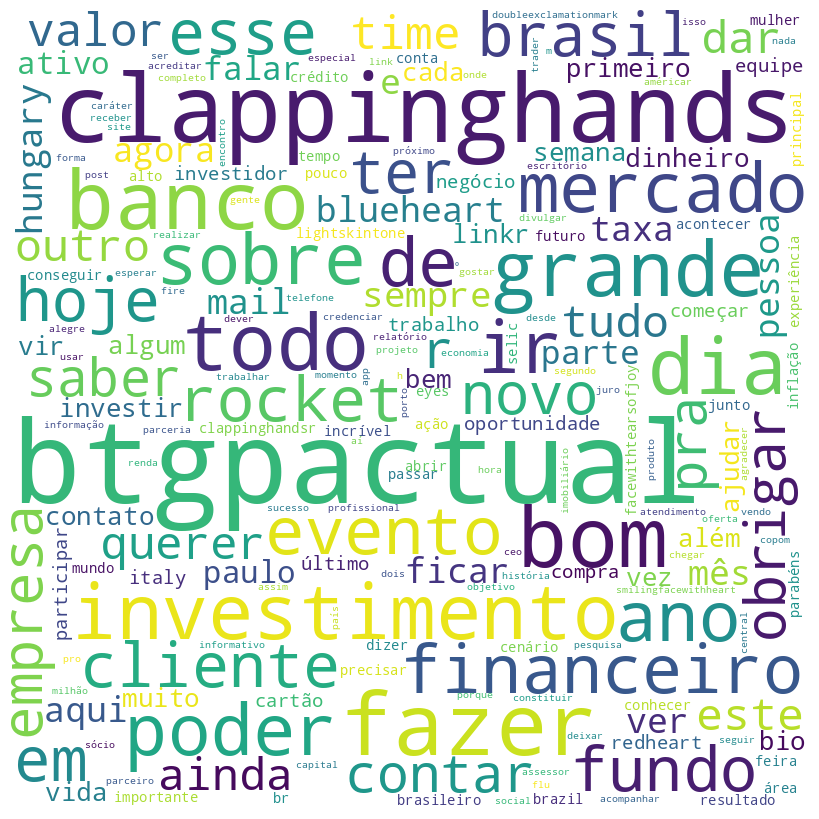

In [26]:
# Criar uma lista das palavras e suas frequ√™ncias a partir do DataFrame de sa√≠da
palavras = output['Palavra'].tolist()
frequencias = output['Frequ√™ncia'].tolist()

# Criar um dicion√°rio de palavras e frequ√™ncias, aqui as palavras s√£o as chaves e as frequ√™ncias s√£o os valores
dicionario_palavras = {palavras[i]: frequencias[i] for i in range(len(palavras))}

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dicionario_palavras)

# Plotar a nuvem de palavras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

- Agora irei plotar uma gr√°fico de barras como uma forma alternativa de visualiza√ß√£o.

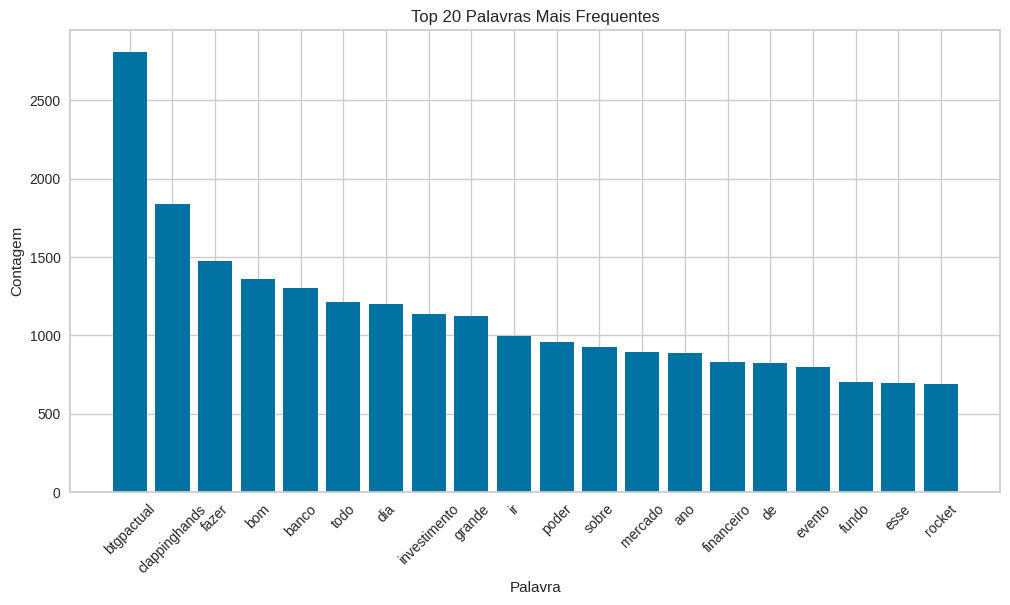

In [27]:
# Obter as palavras e suas frequ√™ncias do DataFrame de sa√≠da
palavras = output['Palavra'].tolist()
frequencias = output['Frequ√™ncia'].tolist()

# Plotagem do gr√°fico de barras, com as 20 palavras mais frequentes
plt.figure(figsize=(12, 6))
plt.bar(range(20), frequencias[:20])
plt.xticks(range(20), palavras[:20], rotation=45)  # Definir os r√≥tulos do eixo x como os nomes das palavras
plt.xlabel('Palavra')
plt.ylabel('Contagem')
plt.title('Top 20 Palavras Mais Frequentes')
plt.show()

# 5. BoW + Naive Bayes

## Naive Bayes

- Aqui irei aplicar um modelo demonstrativo utilizando o algoritmo de Naive Bayes, a partir da matriz apresentada pelo modelo Bag of Words

In [28]:
encoder = LabelEncoder() # Instanciando o encoder para transformar as classes em n√∫meros inteiros, a partir da biblioteca LabelEncoder

# ajustando o codificador aos dados da coluna 'sentimento' para ser poss√≠vel de se aplicar na predi√ß√£o
sentimento = encoder.fit_transform(df['sentimento'])

# Dividir os dados em treino e teste, a partir da biblioteca de train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(bow_model, sentimento, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes, a partir da biblioteca do NB
modelo = MultinomialNB()
modelo.fit(X_treino, y_treino)

# Fazer a predi√ß√£o usando os dados de teste
predicao_numerica = modelo.predict(X_teste)

# Decodificar as classes preditas
predicao = encoder.inverse_transform(predicao_numerica)

print(classification_report(df['sentimento'].iloc[y_teste], predicao))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.88      0.46      0.61      1230
           2       0.63      0.76      0.69       612

    accuracy                           0.56      1842
   macro avg       0.50      0.41      0.43      1842
weighted avg       0.79      0.56      0.63      1842



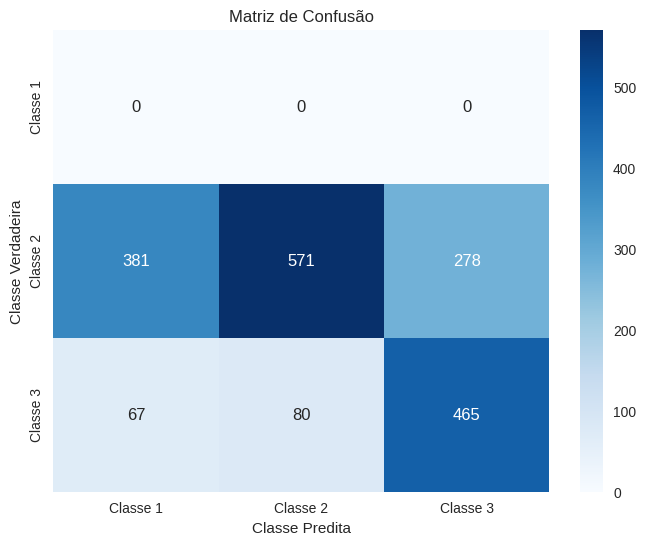

In [29]:
cm = confusion_matrix(df['sentimento'].iloc[y_teste], predicao)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confus√£o')
plt.show()

In [30]:
with open('bow_naivebayes_sprint3.pkl', 'wb') as arquivo:
    pickle.dump(modelo, arquivo)
with open('bow_naivebayes_sprint3.pkl', 'rb') as arquivo:
    bow_naivebayes_sprint3 = pickle.load(arquivo)

## Naive Bayes - Valida√ß√£o cruzada (Cross Validation)

- Agora, irei aplicar o m√©todo de cross-validation 7 vezes para analisar os resultados

- O m√©todo de valida√ß√£o cruzada (cross-validation) √© uma t√©cnica usada para avaliar o desempenho de um modelo de aprendizado de m√°quina. Ele ajuda a estimar o desempenho do modelo em dados n√£o vistos, fornecendo uma medida mais robusta da sua capacidade de generaliza√ß√£o.

In [31]:
# Avaliar o modelo usando valida√ß√£o cruzada
scores = cross_val_score(modelo, bow_model, sentimento, cv=7)

# Exibir a acur√°cia m√©dia do modelo
print('Acur√°cia m√©dia:', scores.mean())

# Fazer a predi√ß√£o usando valida√ß√£o cruzada
predicoes = cross_val_predict(modelo, bow_model, sentimento, cv=7)

# Decodificar as classes preditas
predicao = encoder.inverse_transform(predicoes)

# Imprimir o relat√≥rio de classifica√ß√£o
print('Relat√≥rio de Classifica√ß√£o:')
print(classification_report(df['sentimento'], predicao))

Acur√°cia m√©dia: 0.6724311486588003
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      1974
           1       0.78      0.58      0.67      4012
           2       0.62      0.75      0.68      3221

    accuracy                           0.67      9207
   macro avg       0.67      0.69      0.67      9207
weighted avg       0.69      0.67      0.67      9207



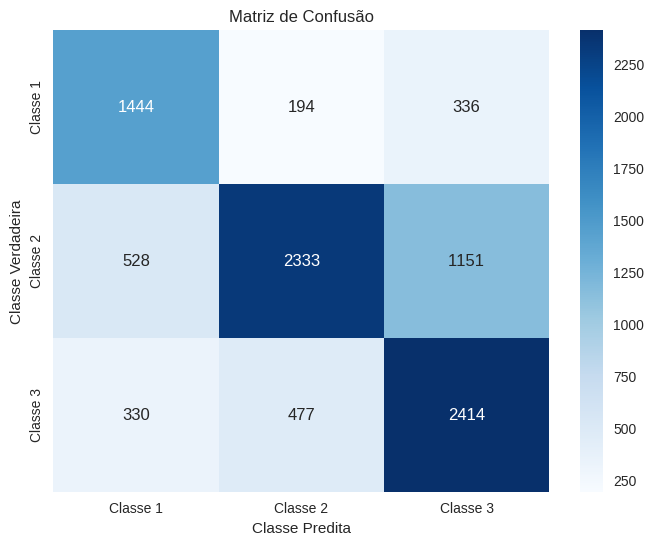

In [32]:
cm = confusion_matrix(df['sentimento'], predicao)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confus√£o')
plt.show()

## Naive Bayes - GridSearch

- Agora irei aplicar a t√©cnica de GridSearch
- Grid search √© uma t√©cnica de busca de hiperpar√¢metros usada para encontrar a melhor combina√ß√£o de valores para um modelo de aprendizado de m√°quina. Ele consiste em definir um conjunto de valores para cada hiperpar√¢metro e treinar e avaliar o modelo com todas as combina√ß√µes poss√≠veis. O conjunto de hiperpar√¢metros que produz a melhor m√©trica de avalia√ß√£o √© selecionado como a configura√ß√£o final do modelo.


### Acur√°cia

In [34]:
# Definir a grade de valores para os hiperpar√¢metros a serem testados
parametros = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True, False]}

# Criar uma inst√¢ncia do modelo MultinomialNB
modelo = MultinomialNB()

# Criar uma inst√¢ncia do objeto GridSearchCV
grid = GridSearchCV(modelo, parametros, cv=5, scoring='accuracy')

# Treinar o modelo com a busca exaustiva de hiperpar√¢metros
grid.fit(X_treino, y_treino)

# Exibir os resultados da busca exaustiva
print('Melhores hiperpar√¢metros:', grid.best_params_)
print('Melhor acur√°cia:', grid.best_score_)

# Criar um novo modelo com os melhores hiperpar√¢metros encontrados
modelo = MultinomialNB(alpha=grid.best_params_['alpha'], fit_prior=grid.best_params_['fit_prior'])
modelo.fit(X_treino, y_treino)

# Fazer a predi√ß√£o usando os dados de teste
predicao_numerica = modelo.predict(X_teste)

# Decodificar as classes preditas
predicao = encoder.inverse_transform(predicao_numerica)

# Avaliar a acur√°cia do modelo no conjunto de teste
acuracia = accuracy_score(df['sentimento'].iloc[y_teste], predicao)
print('Acur√°cia no conjunto de teste:', acuracia)

Melhores hiperpar√¢metros: {'alpha': 0.5, 'fit_prior': True}
Melhor acur√°cia: 0.693550577053632
Acur√°cia no conjunto de teste: 0.5537459283387622


### Recall

-  Aqui n√≥s podemos ver a revoca√ß√£o do Gridsearch

In [36]:
# Definir a grade de valores para os hiperpar√¢metros a serem testados
parametros = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True, False]}

# Criar uma inst√¢ncia do modelo MultinomialNB
modelo = MultinomialNB()

# Criar uma inst√¢ncia da m√©trica de avalia√ß√£o recall
recall = make_scorer(recall_score, average='macro')

# Criar uma inst√¢ncia do objeto GridSearchCV
grid = GridSearchCV(modelo, parametros, cv=5, scoring=recall)

# Treinar o modelo com a busca exaustiva de hiperpar√¢metros
grid.fit(X_treino, y_treino)

# Exibir os resultados da busca exaustiva
print('Melhores hiperpar√¢metros:', grid.best_params_)
print('Melhor revoca√ß√£o:', grid.best_score_)

Melhores hiperpar√¢metros: {'alpha': 0.1, 'fit_prior': True}
Melhor revoca√ß√£o: 0.7103233123310607


# Random Forest + BoW

## Random Forest

In [38]:
# Criar uma inst√¢ncia do modelo Random Forest
rfc = RandomForestClassifier()

# Treinar o modelo com os dados de treino
rfc.fit(X_treino, y_treino)

# Fazer previs√µes com o modelo treinado
y_pred = rfc.predict(X_teste)

# Calcular o recall do modelo
recall = recall_score(y_teste, y_pred, average='macro')

if len(np.unique(y_pred)) == 1:
    print("O modelo tem apenas uma classe de sa√≠da poss√≠vel.")
else:
    classification = classification_report(y_teste, y_pred)
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification)



Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       386
           1       0.78      0.76      0.77       844
           2       0.65      0.77      0.70       612

    accuracy                           0.71      1842
   macro avg       0.71      0.68      0.69      1842
weighted avg       0.72      0.71      0.71      1842



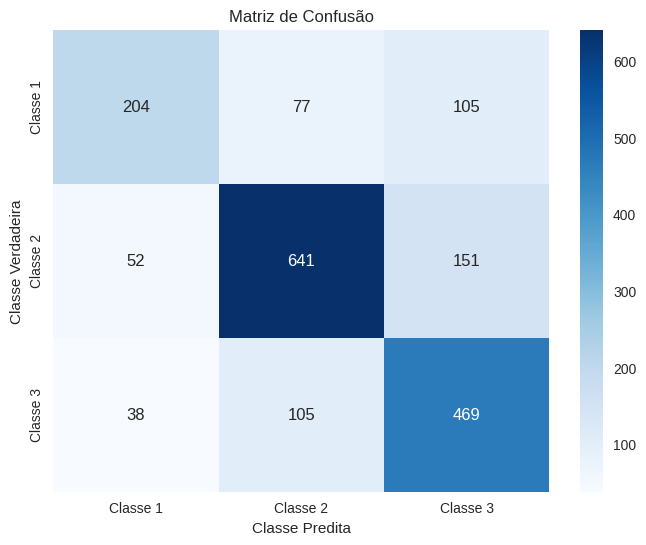

In [39]:
cm = confusion_matrix(y_teste, y_pred)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot
=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confus√£o')
plt.show()

In [40]:
with open('random_forest_sprint3.pkl', 'wb') as arquivo:
    pickle.dump(rfc, arquivo)
with open('random_forest_sprint3.pkl', 'rb') as arquivo:
    random_forest_sprint3 = pickle.load(arquivo)

## Random Forest - Valida√ß√£o Cruzada (Cross Validation)

- Aqui irei realizar a valida√ß√£o cruzada do modelo Random Forest e ver seu resultado

In [41]:
# Criar uma inst√¢ncia do modelo Random Forest
rfc = RandomForestClassifier()

# Realizar a valida√ß√£o cruzada de 5 folds
scores = cross_val_score(rfc, bow_model, sentimento, cv=5)

# Exibir as pontua√ß√µes de valida√ß√£o cruzada
print('Pontua√ß√µes de valida√ß√£o cruzada:', scores)

# Exibir a m√©dia das pontua√ß√µes de valida√ß√£o cruzada
print('M√©dia da valida√ß√£o cruzada:', scores.mean())

if len(np.unique(y_pred)) == 1:
    print("O modelo tem apenas uma classe de sa√≠da poss√≠vel.")
else:
    classification = classification_report(y_teste, y_pred)
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification)

Pontua√ß√µes de valida√ß√£o cruzada: [0.65743757 0.67318132 0.68821293 0.6697447  0.70994025]
M√©dia da valida√ß√£o cruzada: 0.6797033548188475

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       386
           1       0.78      0.76      0.77       844
           2       0.65      0.77      0.70       612

    accuracy                           0.71      1842
   macro avg       0.71      0.68      0.69      1842
weighted avg       0.72      0.71      0.71      1842



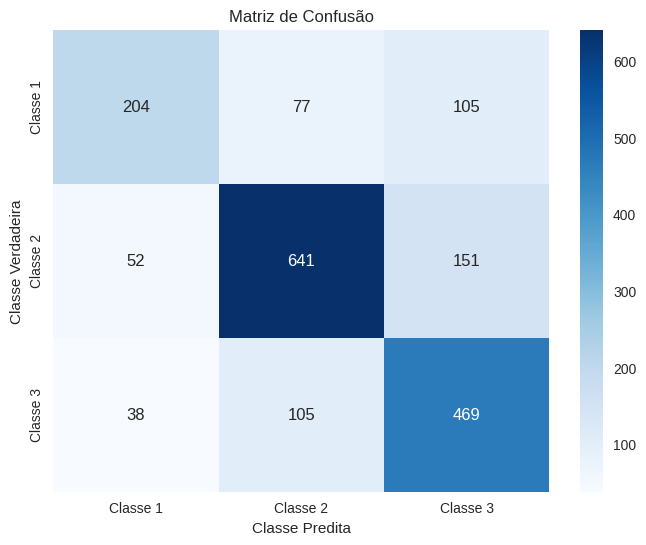

In [42]:
cm = confusion_matrix(y_teste, y_pred)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot
=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confus√£o')
plt.show()

## Random Forest - Grid Search

- Aqui irei realizar o grid search e ver seus melhores resultados

In [44]:
# Definir a grade de valores para os hiperpar√¢metros a serem testados
parametros = {'n_estimators': [100, 200, 300], 
              'max_depth': [None, 10, 20], 
              'min_samples_split': [2, 5, 10]}

# Criar uma inst√¢ncia do modelo Random Forest
rfc = RandomForestClassifier()

# Criar uma inst√¢ncia do objeto GridSearchCV
grid = GridSearchCV(rfc, parametros, cv=5, n_jobs=-1)

# Realizar a busca em grade com valida√ß√£o cruzada
grid.fit(bow_model, sentimento)

# Exibir os resultados da busca em grade
print('Melhores hiperpar√¢metros:', grid.best_params_)
print('Melhor pontua√ß√£o:', grid.best_score_)

if len(np.unique(y_pred)) == 1:
    print("O modelo tem apenas uma classe de sa√≠da poss√≠vel.")
else:
    classification = classification_report(y_teste, y_pred)
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification)

KeyboardInterrupt: ignored

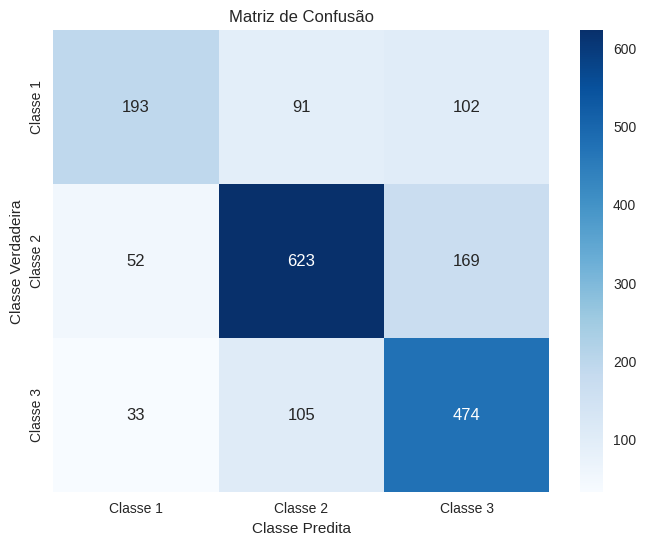

In [ ]:
cm = confusion_matrix(y_teste, y_pred)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot
=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confus√£o')
plt.show()

# Pycaret

O PyCaret executa uma compara√ß√£o automatizada de v√°rios algoritmos de aprendizado de m√°quina com v√°rias m√©tricas de valida√ß√£o para selecionar o melhor modelo para um determinado problema. Ele oferece a op√ß√£o de escolher o modelo com o melhor desempenho com base em m√©tricas como precis√£o, recall, F1-score, AUC-ROC, entre outras. Dessa forma, o PyCaret ajuda a simplificar e agilizar o processo de sele√ß√£o de modelos para cientistas de dados e analistas de neg√≥cios.


In [ ]:
# Criar o modelo de Bag-of-Words
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(df['texto_tratado'])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(bow_model, df['sentimento'], test_size=0.2, random_state=42)

# Criar e treinar o modelo de classifica√ß√£o de sentimentos
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Fazer a previs√£o usando os dados de teste
predictions = classifier.predict(X_test)

#Configurar o ambiente PyCaret e treinar o modelo usando valida√ß√£o cruzada
classif = setup(data = df, target = 'sentimento', verbose=False)
best_model = compare_models()

# Fazer a previs√£o usando os dados de teste
predictions = predict_model(best_model, data=X_test)

# Avaliar o desempenho do modelo
evaluate_model(best_model)